#### Importing packages

In [308]:
import pandas as pd
import seaborn as sns

#### Creating Dataframe

In [309]:
nyc_trees = pd.read_csv("original_data.csv", parse_dates=["created_at"])
print(nyc_trees.isna().sum())
print(nyc_trees.dtypes)
print(nyc_trees.columns)

created_at       0
tree_id          0
block_id         0
the_geom         0
tree_dbh         0
stump_diam       0
curb_loc         0
status           0
health        4993
spc_latin     4992
spc_common    4992
steward       4992
guards        4992
sidewalk      4992
user_type        0
problems      4992
root_stone       0
root_grate       0
root_other       0
trnk_wire        0
trnk_light       0
trnk_other       0
brnch_ligh       0
brnch_shoe       0
brnch_othe       0
address          0
zipcode          0
zip_city         0
cb_num           0
borocode         0
boroname         0
cncldist         0
st_assem         0
st_senate        0
nta              0
nta_name         0
boro_ct          0
state            0
latitude         0
longitude        0
x_sp             0
y_sp             0
dtype: int64
created_at    datetime64[ns]
tree_id                int64
block_id               int64
the_geom              object
tree_dbh               int64
stump_diam             int64
curb_loc       

#### Removing columns wich are useless for Machine Learning

In [310]:
nyc_trees.drop(columns=["the_geom", "spc_common", "problems", "cb_num","borocode","boroname","cncldist","st_assem","st_senate","boro_ct","state"], axis=1, inplace=True)

'nyc_trees.drop(columns=["the_geom", "spc_common", "problems", "zip_city", "cb_num","borocode","boroname","cncldist","st_assem","st_senate","boro_ct","state"], axis=1, inplace=True)'

#### Checking out NaN's

In [356]:
nan = nyc_trees[nyc_trees["health"].isna() == True]
nan = nan.drop_duplicates(["health","spc_latin"])


### Exploring column by column
#### tree_id

In [311]:
len(nyc_trees.tree_id.unique())

100000

#### tree_dbh

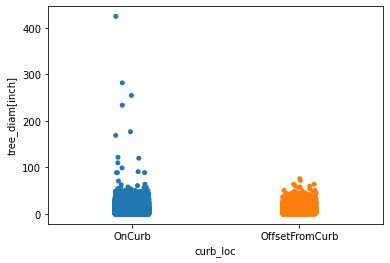

In [313]:
# Changing column name
nyc_trees.rename(columns={"tree_dbh":"tree_diam[inch]","stump_diam":"stump_diam[inch]"},inplace=True)

# Outliers in column to None
sns.stripplot(data=nyc_trees, x="curb_loc", y="tree_diam[inch]", jitter=True)
tree_dbh_lst = nyc_trees[nyc_trees["tree_diam[inch]"] >= 80].value_counts(["tree_diam[inch]"],ascending=False)
nyc_trees.loc[tree_dbh_lst, "tree_diam[inch]"] = None



#### Changing tree_diam and stump_diam columns.
* If stump, remove from tree_diam, replace with None
* If tree, remove value from stump_diam, replace with None

In [314]:
nyc_trees.status.value_counts()
stumps_lst = nyc_trees[nyc_trees["status"] == "Stump"].index
alive_lst = nyc_trees[nyc_trees["status"] == "Alive"].index
nyc_trees.loc[stumps_lst, "tree_diam[inch]"] = None
nyc_trees.loc[alive_lst, "stump_diam[inch]"] = None

#### curb_loc

In [315]:
# Should contain 2 categories
nyc_trees.curb_loc.value_counts()

OnCurb            96129
OffsetFromCurb     3871
Name: curb_loc, dtype: int64

#### status

In [316]:
# Should contain 3 categories
nyc_trees.status.value_counts()


Alive    95008
Stump     2831
Dead      2161
Name: status, dtype: int64

#### health

In [317]:
# Should contain 3 categories.
nyc_trees["health"].value_counts()


Good    72340
Fair    17266
Poor     5401
Name: health, dtype: int64

#### spc_latin - spc_common

In [318]:
# Checking if these columns always compare
print(nyc_trees.spc_latin.value_counts())

Platanus x acerifolia                 11976
Gleditsia triacanthos var. inermis    10648
Pyrus calleryana                       8886
Quercus palustris                      7748
Acer platanoides                       5925
                                      ...  
Cedrus atlantica                          5
Alnus glutinosa                           5
Maclura pomifera                          4
Pinus sylvestris                          3
Pinus virginiana                          2
Name: spc_latin, Length: 125, dtype: int64


#### steward

In [319]:
print(nyc_trees["steward"].sample(30))

# turning into int type
def steward_int(word):
    if word is None:
        return None
    elif word == "None":
        return 0
    elif type(word) == float:
        return word
    else:
        return int(word[0])

nyc_trees["steward"] = nyc_trees["steward"].apply(lambda x: steward_int(x))
print(nyc_trees["steward"].sample(30))

49764    None
97593    None
98792    1or2
96333    None
13022    1or2
65329    None
64730    None
46183    None
78518    None
56473    None
96511    None
38344    1or2
33186    1or2
13227    None
82312    1or2
26123    None
19222    None
60375    1or2
30125    None
82281    1or2
13984    1or2
17523    None
10834    None
86805    1or2
28164    None
36872    None
61859     NaN
74742    1or2
35585    None
19754    None
Name: steward, dtype: object
31575    3.0
3373     0.0
16735    0.0
9753     1.0
51364    1.0
98192    0.0
3635     NaN
59991    0.0
51582    0.0
54351    1.0
64978    0.0
48561    0.0
28107    1.0
27424    0.0
41475    0.0
80578    1.0
33040    0.0
57184    0.0
20753    0.0
56497    1.0
43806    3.0
29597    1.0
31456    0.0
78717    0.0
28647    0.0
82567    1.0
49676    1.0
65700    0.0
59583    0.0
2800     1.0
Name: steward, dtype: float64


#### guards

In [320]:
print(nyc_trees["guards"].value_counts())

None       78958
Helpful    10244
Harmful     4552
Unsure      1254
Name: guards, dtype: int64


In [321]:
# Clean the None for Unsure
def guards_cleaning(dead_or_alive:str, guards:str):
    if guards == "None" and dead_or_alive == "Alive":
        return "Unsure"
    else:
        return guards

nyc_trees["guards"] = nyc_trees.apply(lambda row: guards_cleaning(row["status"],row["guards"]), axis=1)


In [322]:
print(nyc_trees.columns)


Index(['created_at', 'tree_id', 'block_id', 'the_geom', 'tree_diam[inch]',
       'stump_diam[inch]', 'curb_loc', 'status', 'health', 'spc_latin',
       'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems',
       'root_stone', 'root_grate', 'root_other', 'trnk_wire', 'trnk_light',
       'trnk_other', 'brnch_ligh', 'brnch_shoe', 'brnch_othe', 'address',
       'zipcode', 'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp'],
      dtype='object')


#### sidewalk

In [323]:
# Changing column name to sidewalk_damaged
nyc_trees = nyc_trees.rename(columns={"sidewalk":"sidewalk_damaged"})

# Changing values to boolean
def sidewalk_bool(word):
    if word == "Damage":
        return True
    else:
        return False

nyc_trees["sidewalk_damaged"] = nyc_trees["sidewalk_damaged"].apply(lambda x: sidewalk_bool(x))
nyc_trees.sidewalk_damaged.value_counts()

False    70678
True     29322
Name: sidewalk_damaged, dtype: int64

#### user_type

In [324]:
nyc_trees.user_type.value_counts()

Volunteer           45924
TreesCount Staff    37363
NYC Parks Staff     16713
Name: user_type, dtype: int64

#### root_stone

In [325]:
# Function to change yes/no to True/False
def yes_no_to_bool(yn:str):
    yn = yn.lower()
    if yn == "yes":
        return True
    elif yn == "no":
        return False

# Changing yes/no to boolean:
nyc_trees.root_stone = nyc_trees.root_stone.apply(lambda x: yes_no_to_bool(x))

#### root_grate

In [326]:
# Changing yes/no to boolean:
nyc_trees.root_grate = nyc_trees.root_grate.apply(lambda x: yes_no_to_bool(x))

#### root_other


In [327]:
# Changing yes/no to boolean:
nyc_trees.root_other = nyc_trees.root_other.apply(lambda x: yes_no_to_bool(x))

#### Changing columns names: all trnk_ columns with trunk_

In [328]:
nyc_trees = nyc_trees.rename(columns={"trnk_wire":"trunk_wire", "trnk_light":"trunk_light","trnk_other":"trunk_other"})

#### trunk_wire

In [329]:
# Changing yes/no to boolean:
nyc_trees.trunk_wire = nyc_trees.trunk_wire.apply(lambda x: yes_no_to_bool(x))

#### trunk_light

In [330]:
# Changing yes/no to boolean:
nyc_trees.trunk_light = nyc_trees.trunk_light.apply(lambda x: yes_no_to_bool(x))

#### trunk_other

In [331]:
# Changing yes/no to boolean:
nyc_trees.trunk_other = nyc_trees.trunk_other.apply(lambda x: yes_no_to_bool(x))

#### Changing columns names: all trnk_ columns with trunk_

In [332]:
nyc_trees = nyc_trees.rename(columns={"brnch_ligh":"branch_light","brnch_shoe":"branch_shoe","brnch_othe":"branch_other"})

#### branch_light

In [333]:
# Changing yes/no to boolean:
nyc_trees.branch_light = nyc_trees.branch_light.apply(lambda x: yes_no_to_bool(x))

#### branch_shoe

In [334]:
# Changing yes/no to boolean:
nyc_trees.branch_shoe = nyc_trees.branch_shoe.apply(lambda x: yes_no_to_bool(x))

#### branch_other

In [335]:
# Changing yes/no to boolean:
nyc_trees.branch_other = nyc_trees.branch_other.apply(lambda x: yes_no_to_bool(x))
